In [1]:
!pip install overpy

In [10]:
import overpy
import shapely

In [3]:
api = overpy.Overpass()

In [5]:
q = """rel["ISO3166-1"="DE"][admin_level=2][boundary=administrative];
out geom;"""
result = api.query(q)
result

In [6]:
len(result.relations)

1

In [12]:
rel = result.relations[0]
nodes = rel.members[0]

In [33]:
from shapely.geometry import LineString, Polygon
from shapely.ops import linemerge, unary_union, polygonize
chunks = []
for way in rel.members:
    if way.geometry is None:
        continue

    lines = []
    for n in way.geometry:
        lines.append((n.lon, n.lat))
    
    chunks.append(LineString(lines))

merged = linemerge(chunks)
border = unary_union(merged)
all_poly = list(polygonize(border))
germany = all_poly[1]
germany

In [42]:
w = Polygon([[-180, -90], [180, -90], [180, 90], [-180, 90], [-180, -90]])
germany_inverse = w.symmetric_difference(germany)

<AxesSubplot:>

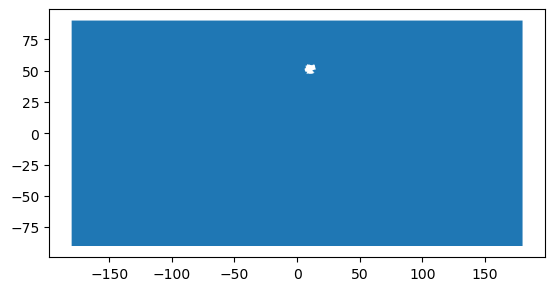

In [53]:
import geopandas
gdf = geopandas.GeoSeries([germany_inverse])
gdf.plot()

In [55]:
with open('./camels_serv/static/germany_mask.geojson', 'w') as f:
    f.write(gdf.to_json())